In [1]:
!pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

# Loads the CSVs
points_df = pd.read_csv("nba_stats_2014_to_2025_.csv")
attendance_df = pd.read_csv("nba_fan_attendance_2014-2015_to_2024-2025.csv")

Saving nba_fan_attendance_2014-2015_to_2024-2025.csv to nba_fan_attendance_2014-2015_to_2024-2025.csv
Saving nba_stats_2014_to_2025_.csv to nba_stats_2014_to_2025_ (1).csv


In [5]:

# Clean attendance data
attendance_cleaned = attendance_df.copy()
attendance_cleaned = attendance_cleaned[attendance_cleaned["TEAM"].notnull()]
attendance_cleaned = attendance_cleaned[attendance_cleaned["TEAM"] != "TEAM"]
attendance_cleaned = attendance_cleaned[attendance_cleaned["TEAM"] != "2015 Attendance"]
attendance_cleaned["HOME_AVG"] = pd.to_numeric(attendance_cleaned["HOME_AVG"], errors="coerce")
attendance_cleaned["Season"] = attendance_cleaned["Season"].apply(lambda s: f"{s.split('-')[0]}-{s.split('-')[1][-2:]}")
attendance_cleaned = attendance_cleaned.rename(columns={"TEAM": "Team"})

# Clean points data
points_df["Points"] = pd.to_numeric(points_df["Points"], errors="coerce")


In [6]:
# Map team abbreviations to full names
team_abbrev_to_name = {
    'ATL': 'Hawks', 'BKN': 'Nets', 'BOS': 'Celtics', 'CHA': 'Hornets', 'CHI': 'Bulls',
    'CLE': 'Cavaliers', 'DAL': 'Mavericks', 'DEN': 'Nuggets', 'DET': 'Pistons', 'GSW': 'Warriors',
    'HOU': 'Rockets', 'IND': 'Pacers', 'LAC': 'Clippers', 'LAL': 'Lakers', 'MEM': 'Grizzlies',
    'MIA': 'Heat', 'MIL': 'Bucks', 'MIN': 'Timberwolves', 'NOP': 'Pelicans', 'NYK': 'NY Knicks',
    'OKC': 'Thunder', 'ORL': 'Magic', 'PHI': '76ers', 'PHX': 'Suns', 'POR': 'Trail Blazers',
    'SAC': 'Kings', 'SAS': 'Spurs', 'TOR': 'Raptors', 'UTA': 'Jazz', 'WAS': 'Wizards'
}
points_df["TeamFull"] = points_df["Team"].map(team_abbrev_to_name)

In [7]:
# Average points per team per season
avg_points_by_team = points_df.groupby(["Season", "TeamFull"])["Points"].mean().reset_index()
avg_points_by_team.columns = ["Season", "Team", "AvgPoints"]

# Merge with attendance data
team_merged_df = pd.merge(avg_points_by_team, attendance_cleaned[["Season", "Team", "HOME_AVG"]],
                          on=["Season", "Team"])
team_merged_df = team_merged_df.rename(columns={"HOME_AVG": "AvgAttendance"}).dropna()

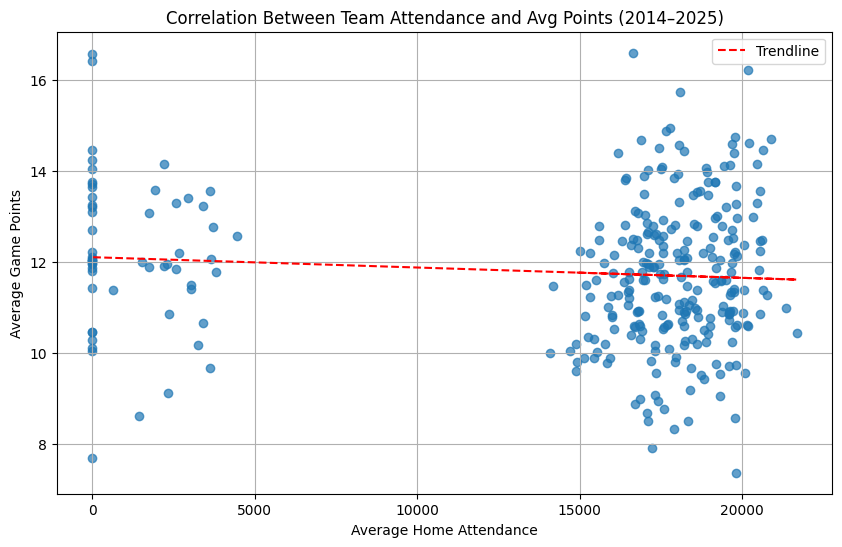

Correlation coefficient (r): -0.094


In [8]:
# Scatter plot: Attendance vs Points
plt.figure(figsize=(10, 6))
plt.scatter(team_merged_df["AvgAttendance"], team_merged_df["AvgPoints"], alpha=0.7)
plt.xlabel("Average Home Attendance")
plt.ylabel("Average Game Points")
plt.title("Correlation Between Team Attendance and Avg Points (2014–2025)")
plt.grid(True)

# Trendline
z = np.polyfit(team_merged_df["AvgAttendance"], team_merged_df["AvgPoints"], 1)
p = np.poly1d(z)
plt.plot(team_merged_df["AvgAttendance"], p(team_merged_df["AvgAttendance"]), "r--", label="Trendline")
plt.legend()
plt.show()

# Displays correlation coefficient
correlation = team_merged_df["AvgAttendance"].corr(team_merged_df["AvgPoints"])
print(f"Correlation coefficient (r): {correlation:.3f}")